# Chapter13 시각 정보를 다루어보자

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 13.1 이미지 데이터는 어떻게 되어 있나

이미지는 무엇인가를 닮도록 인위적으로 만든 것을 뜻한다. 우리가 일상저그로 이미지라고 부르는 것이 대부분은 컴퓨터에 저장된 2차원 시각 정보 파일이다.
- 비트맵 방식 : 색상을 표현하는 점들이 모여 한 장의 이미지가 된다
- 벡터 : 점과 곡선, 면들이 수학적인 식으로 표현
- 픽셀 : 이미지에서 가장 작은 크기의 공간을 차지하며 하나의 색상 값을 가지고 있는 정보

하나의 픽셀이 색상 없이 밝기 정보만 있는 이미지는 회색조라고 한다. 밝기 정보만 표현하는 하나의 채널로 픽셀을 표현할 수 있다.

색을 표현하는 방법은 여러 가지가 있는데 대표적인 방법은 빛의 스펙트럼을 대표하는 빨강, 녹색, 파랑의 강도를 섞어서 나타내는 RGB 방식이다. 이때 각각의 대표 스펙트럼별로 하나의 채널이 할당되고, 한 픽셀을 표현하는 데에 모두 3개의 채널이 사용된다.

세 개의 채널을 사용할 때 빛의 스펙트럼이 아니라 색상, 채도, 밝기로 표현할 수도 있다. 이 방식을 HSV 방식이라고 한다.

## 13.2 맷플롯립으로 간단히 이미지 그려보기

이미지 파일을 읽고 화면에 표시하는 것은 다양한 방식으로 가능하다. 이미지는 2차원 배열의 형태로 저장된다.

In [2]:
import os

In [3]:
os.getcwd()

'/content'

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png') # 이미지 데이터가 위치한 곳의 경로를 적는다
print(img)

[[[0.45882353 0.41960785 0.21960784]
  [0.26666668 0.22352941 0.14509805]
  [0.42352942 0.36078432 0.20784314]
  ...
  [0.36862746 0.36078432 0.22745098]
  [0.5254902  0.50980395 0.33333334]
  [0.56078434 0.60784316 0.40784314]]

 [[0.42352942 0.36078432 0.20784314]
  [0.32941177 0.3019608  0.1764706 ]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.4117647  0.5019608  0.34901962]
  [0.36862746 0.35686275 0.29411766]
  [0.27450982 0.30588236 0.21176471]]

 [[0.45882353 0.41960785 0.21960784]
  [0.45882353 0.41960785 0.21960784]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.37254903 0.40392157 0.24313726]
  [0.28235295 0.27450982 0.1764706 ]
  [0.47058824 0.5372549  0.3529412 ]]

 ...

 [[0.3647059  0.46666667 0.4117647 ]
  [0.44705883 0.5803922  0.6117647 ]
  [0.52156866 0.5686275  0.6039216 ]
  ...
  [0.36078432 0.41960785 0.34509805]
  [0.39215687 0.36078432 0.36078432]
  [0.32941177 0.32156864 0.28627452]]

 [[0.44705883 0.5803922  0.6117647 ]
  [0.5254902  0.61960787 0.61960787]


숫자로는 이미지의 내용을 확인하기가 어렵다. 이 내용을 시각적으로 보이고 싶으면 pyplot 모듈이 가진 그리기 함수인 imshow()를 사용한다.

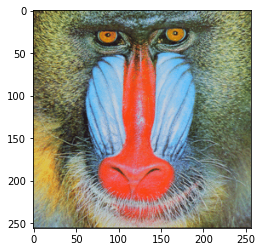

In [5]:
image_plot = plt.imshow(img)
plt.show()

## 13.3 좀 더 편리한 이미지 도구는 없을까

OpenCV는 Open Source Computer Vision을 의미하는 이름이며, 실시간 컴퓨터 비전을 위한 라이브러리이다. 파이썬 프로그래밍 환경에서 사용하기 위해서는 opencv-python 패키지를 설치한다.

In [8]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


원래 OpenCV는 컴퓨터 비전을 위해 만들어졌지만, 현재는 다양한 기계학습 관련 기능도 제공하고 있다.

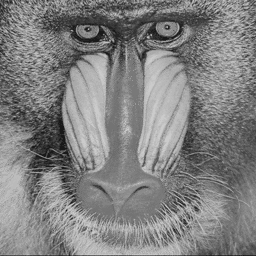

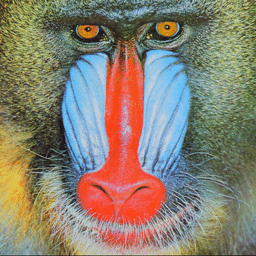

In [15]:
import cv2

img_gray = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png', cv2.IMREAD_COLOR)

cv2_imshow(img_gray) # 맨드릴 원숭이를 회색조 이미지로 화면에 표시
cv2_imshow(img_color) # 맨드릴 원숭이를 컬러 이미지로 화면에 표시

# 키보드 입력을 기다렸다가 모든 창을 끄고 종료하는 코드, 향후 코드에서는 생략함
cv2.waitKey(0) # 사용자 입력을 기다림
cv2.destroyAllWindows() # 모든 창을 없애고 프로그램 종료

위의 코드를 실행시키면 0을 입력할때 까지 계속 실행함

## 13.4 OpenCV로 이미지 다루어 보자

이미지에 선을 그릴 때 cv2 모듈의 line() 함수를 사용할 수 있다. line() 함수는 매개변수들을 가진다.

cv2.line(이미지, 시작지점 좌표, 끝지점 좌표, 색상, 굵기, 선의 종류, 좌표 시프트)

비슷한 함수로 arrowedLine()도 있다. 이것은 끝지점에 화살표를 달아준다.

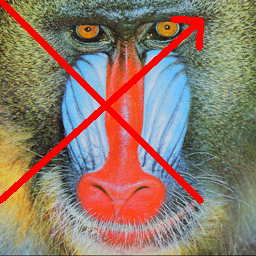

In [24]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png', 1)
cv2.line(img, (0,0), (200,200), (0,0,255), 5) # 직선의 시작점과 끝점, 색상, 두께를 지정함
cv2.arrowedLine(img, (0,200), (200,20), (0,0,255), 5) # 화살표의 시작점, 끝점, 색상, 두께지정
cv2_imshow(img)

line()이나 arrowedLine() 대신에 rectangle() 함수를 호출하면 사각형을 그리게된다. 그리고 putText()를 이용하여 글자를 출력할 수도 있다.

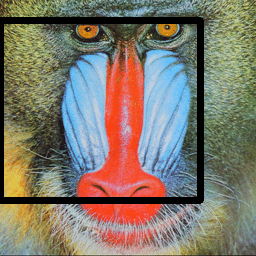

In [25]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png', 1)
cv2.rectangle(img, (0,200), (200,20), (0,0,0), 5) # 사각형의 좌표, 색상을 지정
cv2_imshow(img)

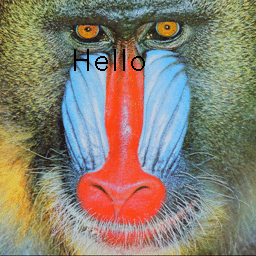

In [26]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/13/mandrill.png', 1)
cv2.putText(img, "Hello", (70,70), fontFace=2, fontScale=1, color=(0,0,0))
cv2_imshow(img)

## 13.5 합성 사진을 제작해 보자

사진을 섞어 보려고 할 때 사용할 수 있는 함수는 addWeighted()이다.

In [ ]:
image_merged = cv2.addWeighted(image_a, weight_for_a, image_b, weight_for_b)

NameError: name 'image_a' is not defined

주의해야 할 점은 두 이미지의 사이즈가 같아야 한다는 것이다. 그렇지 않으면 cv2.ewsize() 함수를 이용하여 두 이미지의 크기를 동일하게 만들고 진행해야 한다.

가중치를 조절하기 위해 OpenCV에서 제공하는 트랙바를 사용할 수 있다.

createTrackbar(조절할 값의 이름, 부착할 창 이름, 최솟값, 최댓값, 변경시 호출될 함수)

In [ ]:
import cv2
global img1, img2 # 두 이미지를 프로그램의 전체에서 사용할 수 있도록 함

def on_change_weight(x): # 상단 트랙바 막대가 움직이게 되면 이 함수가 호출된다
    weight = x / 100 # x 값이 0에서 100사이이므로 100으로 나누어 0에서 1사이 값으로 나타난다
    img_merged = cv2.addWeighted(img1, 1-weight, img2, weight, 0)
    cv2.imshow('Display', img_merged)
    
cv2.namedWindow('Display')
cv2.createTrackbar('weight', 'Display', 0, 100, on_change_weight)

img1 = cv2.imread('c:\kdt\green_back.png')
img2 = cv2.imread('c:\kdt\iceberg.png')
img1 = cv2.resize(img1, (300,400))
img2 = cv2.resize(img2, (300,400))

## 13.6 이미지에 마스크를 씌워볼까

이미지를 비트 단위로 연산하는 일도 가능하다. 대표적인 것을 마스크를 이용하여 이미지의 특정한 부분만 남기거나 사라지게 할 수 있다.

- & : 비트 단위 AND / 두 개의 피연산자의 해당 비트가 모두 1이면 1, 아니면 0
- | : 비트 단위 OR / 두 피연산자의 해당 비트 중 하나라도 1이면 1, 아니면 0
- ^ : 비트 단위 XOR / 두 개의 피연산자의 해당 비트의 값이 같으면 0, 아니면 1

In [ ]:
import cv2
mask_image = cv2.imread('c:\kdt\mask_circle.png')
back_image = cv2.imread('c:\kdt\iceberg.png')
mask_image = cv2.resize(mask_image, (300,400))
back_image = cv2.resize(back_image, (300,400))

mask_ANDed = cv2.botwise_and(mask_image, back_image) # 마스크와 비트단위 AND 연산
mask_ORed = cv2.bitwise_or(mask_image, back_image) # 마스크와 비트단위 OR 연산
mask_XORed = cv2.bitwise_xor(mask_image, back_image) # 마스크와 비트단위 XOR 연산

cv2.imshow('mask', mask_image)
cv2.imshow('back', back_image)
cv2.imshow('mask and', mask_ANDed)
cv2.imshow('mask or', mask_ORed)
cv2.imshow('mask xor', mask_XORed)

AttributeError: module 'cv2' has no attribute 'botwise_and'

## 13.7 원하는 색깔 픽셀만 뽑아 보자

이미지에서 특정항 색상을 가진 픽셀을 뽑아내기 위해서 mandrill.png 파일을 사용한다. 푸른색 픽셀만 추출할 떄는 HSV 방식이 적합하다. 색상은 0도에서 360도로 잡을 때 푸른색은 160도에서 260도 정도의 범위를 차지한다.

이미지에서 색상의 범위를 0에서 360 사이의 정수로 표현하면 한 바이트 이상이 필요하다. 그래서 이미지 파일에서는 이 값을 1/2로 줄여 0도에서 180도 범위로 표현한다.

In [ ]:
import numpy as np
import cv2

image = cv2.imread('c:\kdt\mandrill.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blue_low = np.array([80, 0, 0])
blue_high = np.array([130, 255, 255])

이미지에서 범위에 있는 픽셀들은 1, 그렇지 않은 픽셀은 0으로 표시한 이미지를 뽑아내려고 할 떄 inRange 함수를 이용한다.

In [ ]:
my_mask = cv2.inRange(image_hsv, blue_low, blue_high)

이러한 방식으로 추출한 이후에 원래의 이미지와 추출된 이미지를 비교해 볼 수 있다.

In [ ]:
cv2.imshow('original', image)
cv2.imshow('mask', my_mask)

흑백이미지에서 흰색 부분은 원래 이미지에서 푸른색을 띈 곳이다. 추출한 이미지를 마스크로 이용하여 원래의 이미지에서 푸른색 픽셀만 골라낼 수 있다.

In [ ]:
extracted = cv2.bitwise_and(image, image, mask = my_mask)
cv2.imshow('extracted', extracted)

NameError: name 'cv2' is not defined

컬러를 가진 이미지와 흑백이미지가 가진 채널의 수가 다르면 배열의 크기가 다르기 때문에 오류가 발생한다.

## 13.8 이미지에 필터를 씌워 보자

이미지를 조작할 때 사용하는 방법 중에 커널이라고 불리는 작은 행렬을 사용하여 필터링하는 방법이 있다.

간단한 필터링은 하나의 픽셀을 값을 변경할 때 주위의 값을 고려하여 평균을 취하는 방법이다. 이러한 처리를 이미지 흐림이라고 한다.

커널을 생성하고 싶으면 넘파이를 이용하여 행렬을 만들면 된다.

In [ ]:
kernel = np.ones((3,3), np.float32)/9

NameError: name 'np' is not defined

커널을 특정 이미지에 적용하는 방법은 filter2D() 함수를 사용하는 것이다.

In [ ]:
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderTrype]]]])

처음에 변경할 이미지가 입력되고, ddepth는 이미지 깊이로 -1을 주면 주어진 입력 이미지와 동일한 값이 된다. 그리고 커널 행렬을 입력한다.

In [ ]:
averaged = cv2.filter2D(img, -1, kernel)

3*3 행렬의 커널은 9개 픽셀의 평균으로 픽셀 값을 정한다.

In [ ]:
import numpy as np
import cv2

org = cv2.imread('c:\kdt\mandrill.png', 1)

kernel1 = np.ones((3,3), np.float32) / 9 # 주변 8개의 픽셀과의 평균을 구함
kernel2 = np.ones((9,9), np.float32) / 81 # 주변 80개의 픽셀과의 평균을 구함

averaged33 = cv2.filter2D(org, -1, kernel1)
averaged99 = cv2.filter2D(org, -1, kernel2)

cv2.imshow('original', org)
cv2.imshow('filtered1', averaged33)
cv2.imshow('filtered2', qveraged99)

## 13.9 OpenCV로 이미지 필터링하기

OpenCV에는 다양한 필터를 적용할 수 있는 함수들이 있다. 이미지의 잡음을 줄이는 블러링을 위해서 여러 종류의 필터를 적용할 수 있다. 대표적인 필터가 가우스 필터를 적용하는 가우시안 흐림이다.

가우스 필터는 커널 영역의 모든 픽셀에 동일한 중요성을 부여하는 것이 아니라 중심 픽셀에는 더 높은 중요도를 부여하고, 중심에서 멀어질 수록 중요성을 낮게 한다. 이 중요도를 가중치라고 부르고, 더하는 것을 가중합이라고 한다. 가우스 함수는 종 모양 함수 혹은 정규분포 함수로 잘 알려져 있다.

OpenCV는 가우스 필터를 자동으로 생성하여 적용할 수 있는 GaussianBlur() 함수를 제공한다.

In [ ]:
dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

SyntaxError: invalid syntax (<ipython-input-1-dd162155a37d>, line 1)

첫 매개변수 src는 입력 이미지이고, ksize는 커널의 크기이다. 세 번째 매개변수 sigmaX는 x축 방향으로의 정규분포 표준편차이다. 이 값에 따라 가우스 함수의 모양이 달라진다. 네 번째 매개변수는 선택적으로 사용할 수 있는 것으로 dst는 결과가 출력될 이미지, sigmaY는 y축 표준편차이다.

상자 필터와 비슷한 효과를 얻으려면 sigmaX를 큰 값으로 설정하면 된다.

In [ ]:
import numpy as np
import cv2

org = cv2.imread('c:\kdt\mandrill.png', 1)

averaged33 = cv2.GaussianBlur(org, (3,3), 1)
averaged99 = cv2.GaussianBlur(org, (9,9), 1)

cv2.imshow('original', org)
cv2.imshow('Gaussian 33', averaged33)
cv2.imshow('Gaussian 99', averaged99)

이전에 비해서 부드러운 느낌이 들기는 하지만 원본 이미지의 상이 크게 왜곡없이 나타남을 확인할 수 있다.

## 13.10 다양한 흐림 필터로 잡음을 제거해 보자

이미지를 원본보다 더 흐리게 만드는 일은 잡음을 제거하는 방법으로 널리 사용된다.

mediaBlur()는 중앙값 흐림을 수행하는 함수로, 두 개의 매개변수를 갖는데, 첫 번째는 입력 이미지이고, 두 번째는 정수 n을 인자로 받는다. 그러면 n*n 크기의 필터 영역에서 중앙값을 찾아 그 값으로 픽셀을 설정하는 것이다.

이 흐림 효과는 이미지에서 주위에 비해 튀는 작은 점들을 지우는 데에 효과적이다. 이런 작은 점과 같은 잡음을 소금과 후추 잡음이라고 한다.

In [ ]:
original_image = cv2.imread('c:\kdt\salt_pepper.png', 0)
result_image = cv2.medianBlur(original_image, 5)

bilateralFilter()는 두 개의 기준을 고려하는 양방향 필터이다. 이 필터는 공간 커널에 픽셀의 색상값이 얼마나 차이가 나는지를 고려하는 필터를 하나 더 쓰는 것이다. 양방향 필터를 사용하면 잡음을 제거하면서 이미지의 특징은 더 잘 유지할 수 있게 된다.

In [ ]:
dst = bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])

첫 번째 매개변수는 원본이미지이고, 두 번째 매개변수 d는 필터가 적용되는 커널의 영역의 지름이다. 두 개의 매개변수는 커널 함수의 퍼진 정도를 결정하는데, 두 개의 필터를 사용하므로 각각 하나씩 조절값이 필요하다.